# Data preprocessing concept work

Development notebook for data processing concepts:
1. Potential cleaning
1. Peak detection
1. Data splitting
1. Visual check of every beat
1. Saving in appropriate manner

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mp
import peakutils as pu
from IPython.display import clear_output
import sys, os, glob
import scipy as sp
import scipy.interpolate as spi

Read in csv file, single file for now. To be translated into batch mode down the line.

In [2]:
fname = '20190822-092110.csv'
data = pd.read_csv('../01_raw/'+fname,header=None,names=['time','signal'])
data.shape

(120000, 2)

Some data cleaning may be necessary from serial communication issues, etc.

Check time stamp for contiuity and delete first lines (should be fixed on Arduino side with delay and flush?). Rollover will mess up this feature! Not used for now

In [ ]:
#if not data['time'].is_monotonic:
#    data['dt'] = data['time'].diff()
#    idx = data[data['dt'] < 0].index[0]
#    data = data[idx:]
#data.shape

Plot overview of recorded data

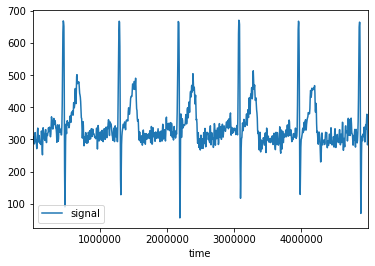

In [3]:
data.head(1000).plot("time","signal")

Persisiting noise from interference may be filtered out fairly effciently with an rolling average approach. Not used for now.

In [4]:
data['avg'] = data['signal'].rolling(4,center=True).mean()

Show original and cleaned signal

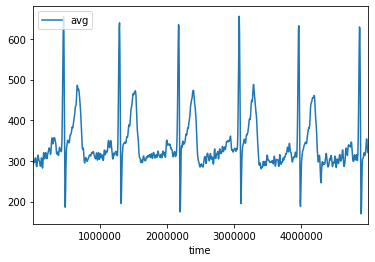

In [5]:
data.head(1000).plot("time","avg")

Peak detecting on signal

In [21]:
idx = pu.indexes(np.array(data['avg'].fillna(0)), thres=0.8, min_dist=150)
len(idx)

551

Plotting

[207500004, 212500004, 0, 700]

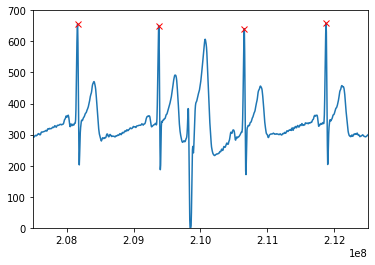

In [22]:
mp.plot(data['time'],data['avg'],label='Raw')
mp.plot(data['time'].iloc[idx],data['avg'].iloc[idx],'rx')
#mp.plot([data['time'].iloc[idx[:-2]+120],data['time'].iloc[idx[:-2]+120]],[0,700],'b--')
#mp.plot([data['time'].iloc[idx[:-2]-60],data['time'].iloc[idx[:-2]-60]],[0,700],'g--')
#mp.legend()
mp.axis([data['time'].iloc[41500],data['time'].iloc[42500],0,700])
#mp.axis([160000,170000,0,700])

Splitting according to determined peak

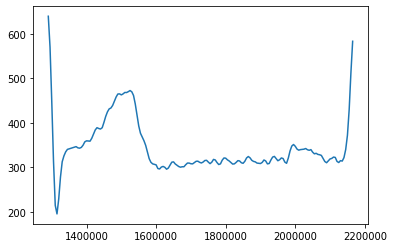

In [23]:
matplotlib.use('Agg')
for i in range(1,2):
    data_int = pd.DataFrame(np.zeros((200,),dtype=int))
    #clear_output()
    #print(str(i)+' of '+str(len(idx)))
    mp.clf()
    sample = data.iloc[idx[i]:idx[i+1]]
    f = spi.interp1d(np.linspace(0,200,len(sample)), sample["avg"].values, kind='linear')
    out = f(np.linspace(0,199,200))
    outname = fname[0:15]+'-{0:04d}'.format(i)+'.csv'
    sample.to_csv('../03_samples/'+outname,header=False,index=False)
    mp.plot(sample["time"],sample["avg"])
    mp.savefig('../03_samples/'+outname[:-3]+'png')

In [55]:
f = spi.interp1d(np.linspace(0,200,len(sample)), sample["avg"].values, kind='linear')
out = pd.DataFrame(f(np.linspace(0,199,200)))

In [56]:
out

,0
0,639.50000
1,578.68750
2,477.93750
3,363.50000
4,263.87500
5,207.28125
6,203.68750
7,235.12500
8,278.00000
9,308.18750
